# Transformers

In [1]:
import os
import sys

os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-09-30 15:47:25.198963: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 15:47:25.213043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 15:47:25.228839: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 15:47:25.233657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 15:47:25.246586: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
[torch.cuda.device(i) for i in range(torch.cuda.device_count())]

[<torch.cuda.device at 0x7f4427c26bd0>, <torch.cuda.device at 0x7f4428bfea90>]

In [6]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader("imdb")

Loading train tensors: 100%|██████████| 7/7 [00:18<00:00,  2.63s/it]


Sample size:  5000


Loading test tensors: 100%|██████████| 9/9 [00:24<00:00,  2.71s/it]


Test size:  5000
Sampled train tensor shape:  torch.Size([20000, 128, 768])
Sampled val tensor shape:  torch.Size([5000, 128, 768])
Sampled test tensor shape:  torch.Size([5000, 128, 768])
Train, Val, Test size:  20000 5000 5000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  2515
neg:  2485


## Classical

In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=8, out_features=8, bias=False)
        )
        (combine_heads): Linear(in_features=8, out_features=8, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=8, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=8, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((8,), eps=1e-05,

Epoch  20/20: 100%|██████████| 313/313 [00:05<00:00, 53.58batch/s, Epoch = 0m 5s, Loss = 0.3179|0.3624, Acc = 0.872|0.849, AUC = 93.716|92.875]

TOTAL TIME = 132.68s
BEST ACC = 0.86% AT EPOCH 15
BEST AUC = 92.92 AT EPOCH 8


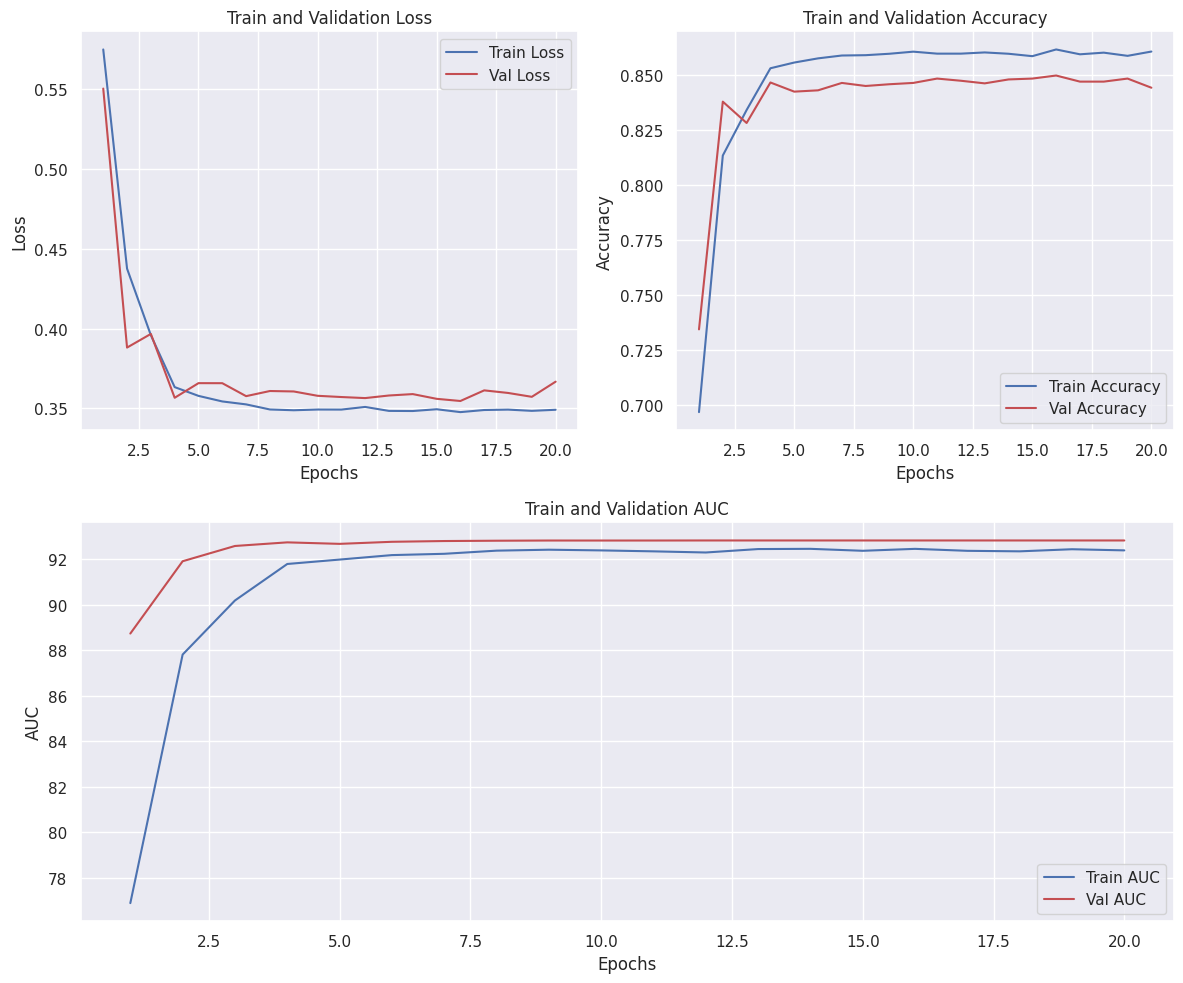

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0,
    lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=16,
    num_heads=2,
    num_blocks=2,
    pooling_method="CLS",
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 7,313 trainable parameters


Epoch  20/20: 100%|██████████| 313/313 [03:29<00:00,  1.50batch/s, Epoch = 3m 29s, Loss = 0.6268|0.6134, Acc = 0.655|0.675, AUC = 70.780|73.084]

TOTAL TIME = 4256.91s
BEST ACC = 0.68% AT EPOCH 16
BEST AUC = 73.08 AT EPOCH 20


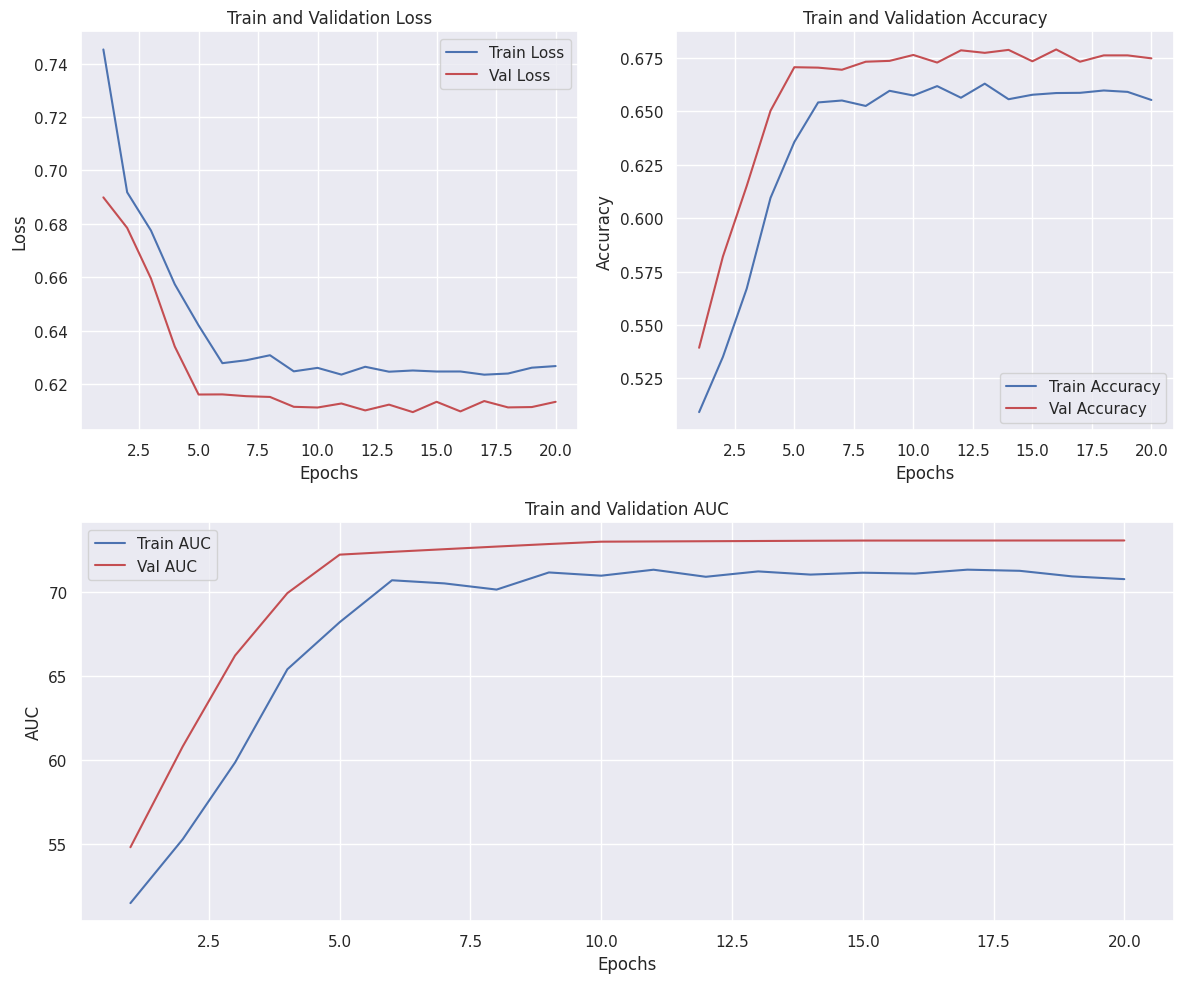

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0,
    lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=16,
    num_heads=2,
    num_blocks=2,
    pooling_method="MEAN",
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 15,617 trainable parameters


Epoch  20/20: 100%|██████████| 313/313 [03:46<00:00,  1.38batch/s, Epoch = 3m 46s, Loss = 0.5388|0.5189, Acc = 0.789|0.787, AUC = 86.961|87.098]

TOTAL TIME = 4278.38s
BEST ACC = 0.79% AT EPOCH 16
BEST AUC = 87.10 AT EPOCH 20


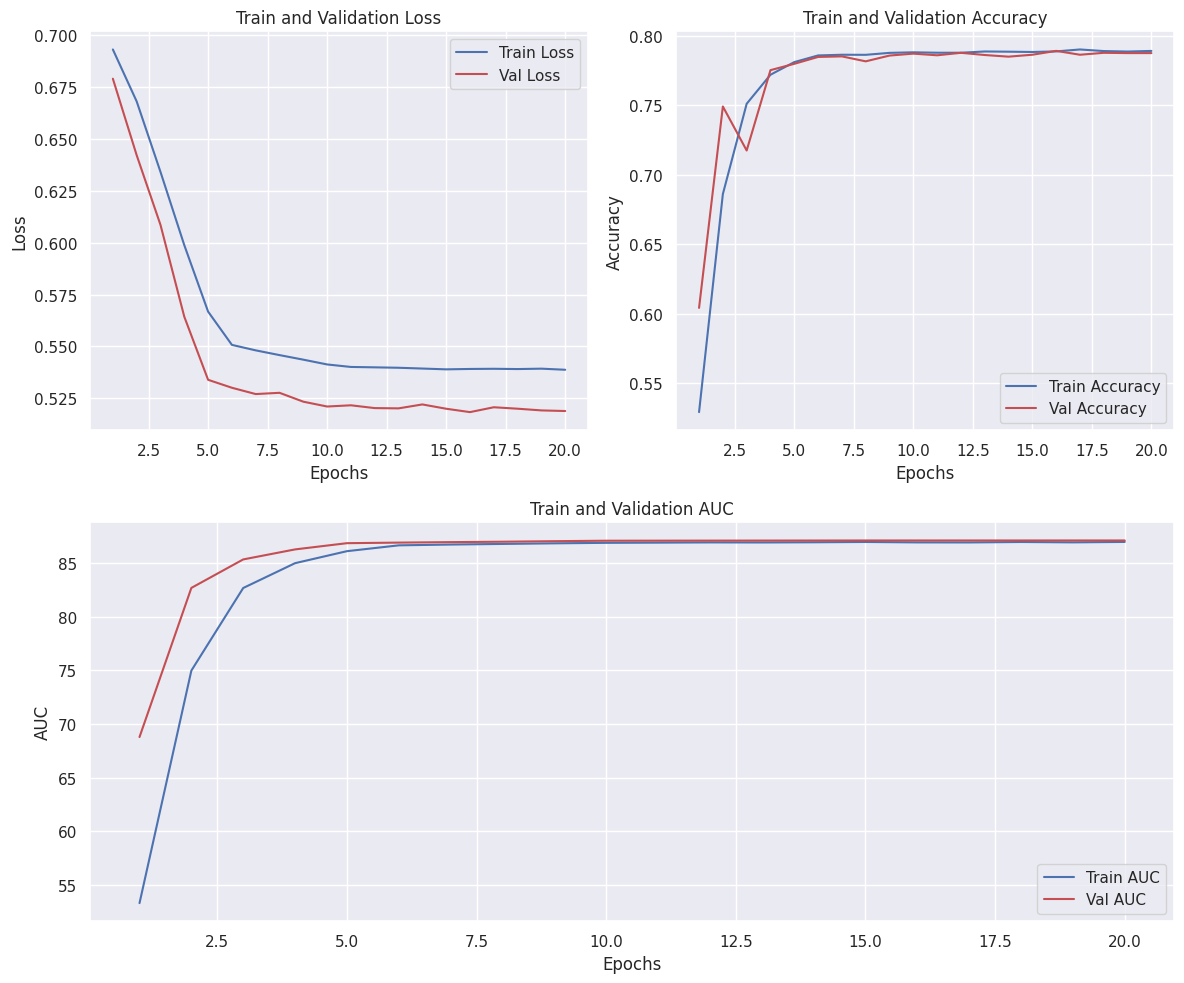

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [10]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0,
    lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=16,
    num_heads=2,
    num_blocks=2,
    pooling_method="MAX",
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 15,617 trainable parameters


Epoch  20/20: 100%|██████████| 313/313 [00:07<00:00, 44.23batch/s, Epoch = 0m 7s, Loss = 0.6458|0.6496, Acc = 0.678|0.670, AUC = 74.079|74.526]

TOTAL TIME = 3708.68s
BEST ACC = 0.67% AT EPOCH 14
BEST AUC = 74.53 AT EPOCH 20


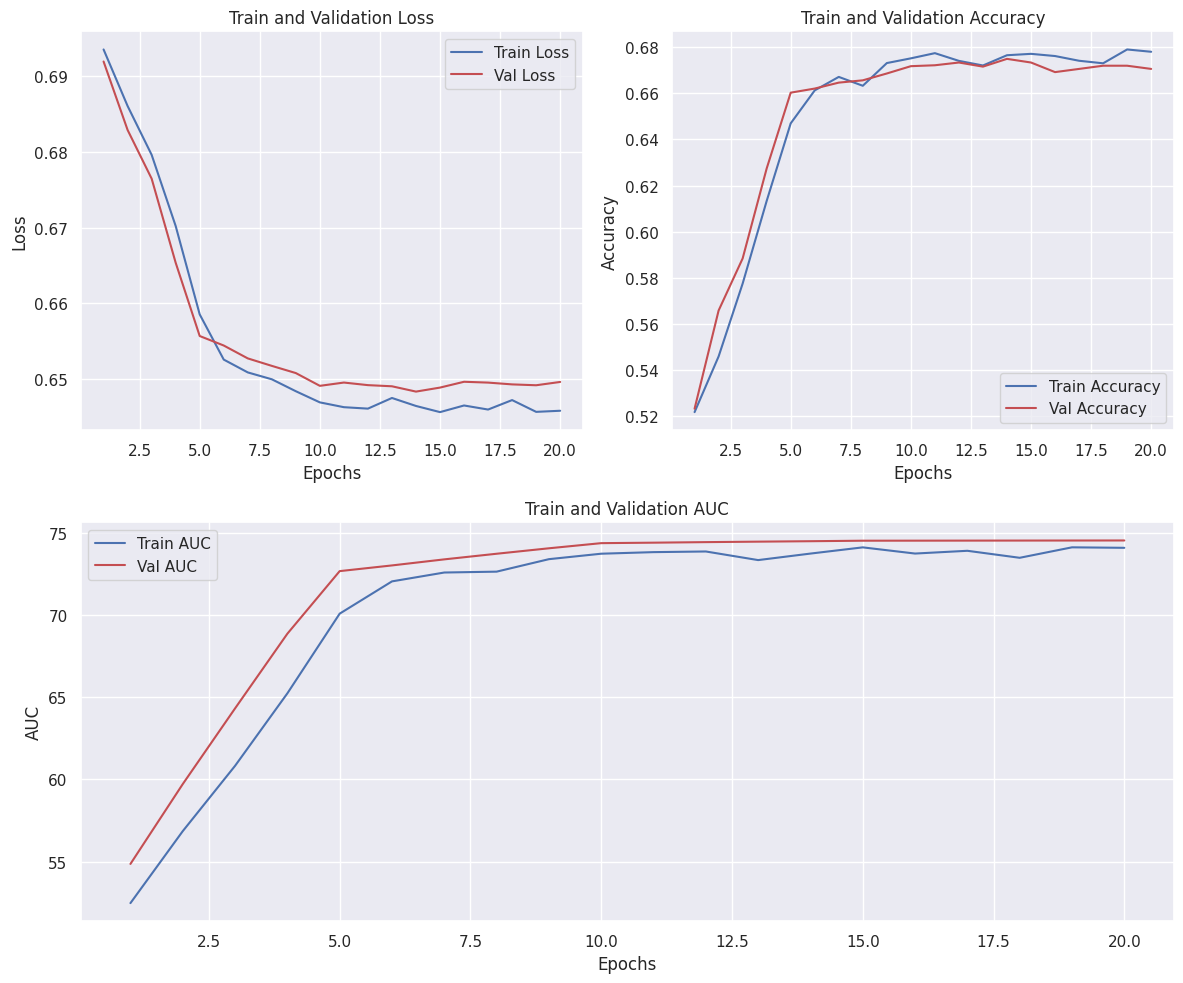

In [11]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [15]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0.1,
    lr=5e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=16,
    num_heads=2,
    num_blocks=2,
    pooling_method="CLS",
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 15,617 trainable parameters


Epoch  20/20: 100%|██████████| 313/313 [00:05<00:00, 52.58batch/s, Epoch = 0m 5s, Loss = 0.4585|0.4569, Acc = 0.795|0.791, AUC = 87.059|87.567]

TOTAL TIME = 101.79s
BEST ACC = 0.79% AT EPOCH 7
BEST AUC = 87.57 AT EPOCH 20


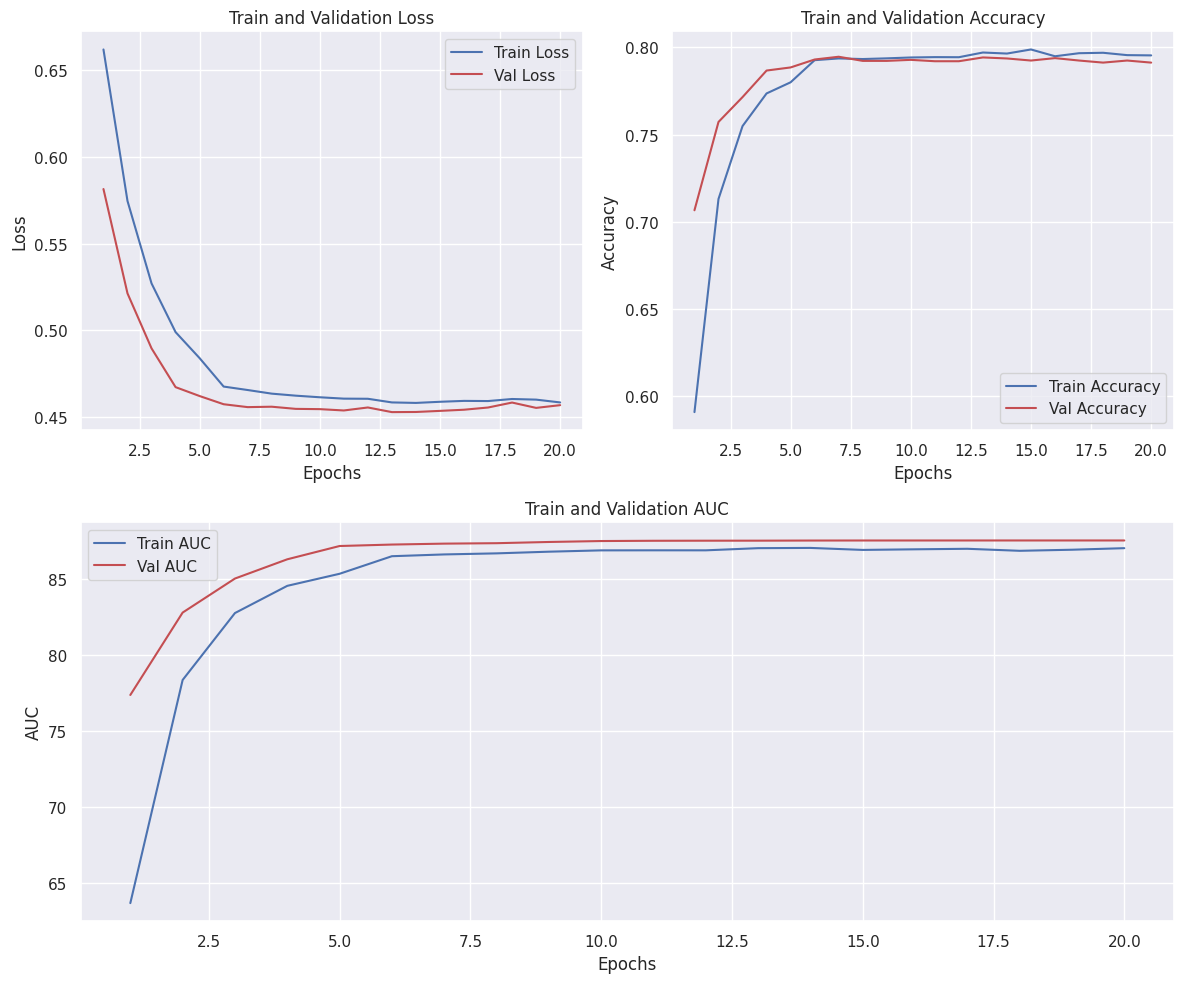

In [16]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [17]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0.1,
    lr=5e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=16,
    num_heads=2,
    num_blocks=2,
    pooling_method="MEAN",
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 15,617 trainable parameters


Epoch  20/20: 100%|██████████| 313/313 [00:08<00:00, 36.45batch/s, Epoch = 0m 8s, Loss = 0.4024|0.4052, Acc = 0.824|0.816, AUC = 90.350|90.159]

TOTAL TIME = 135.31s
BEST ACC = 0.82% AT EPOCH 15
BEST AUC = 90.16 AT EPOCH 15


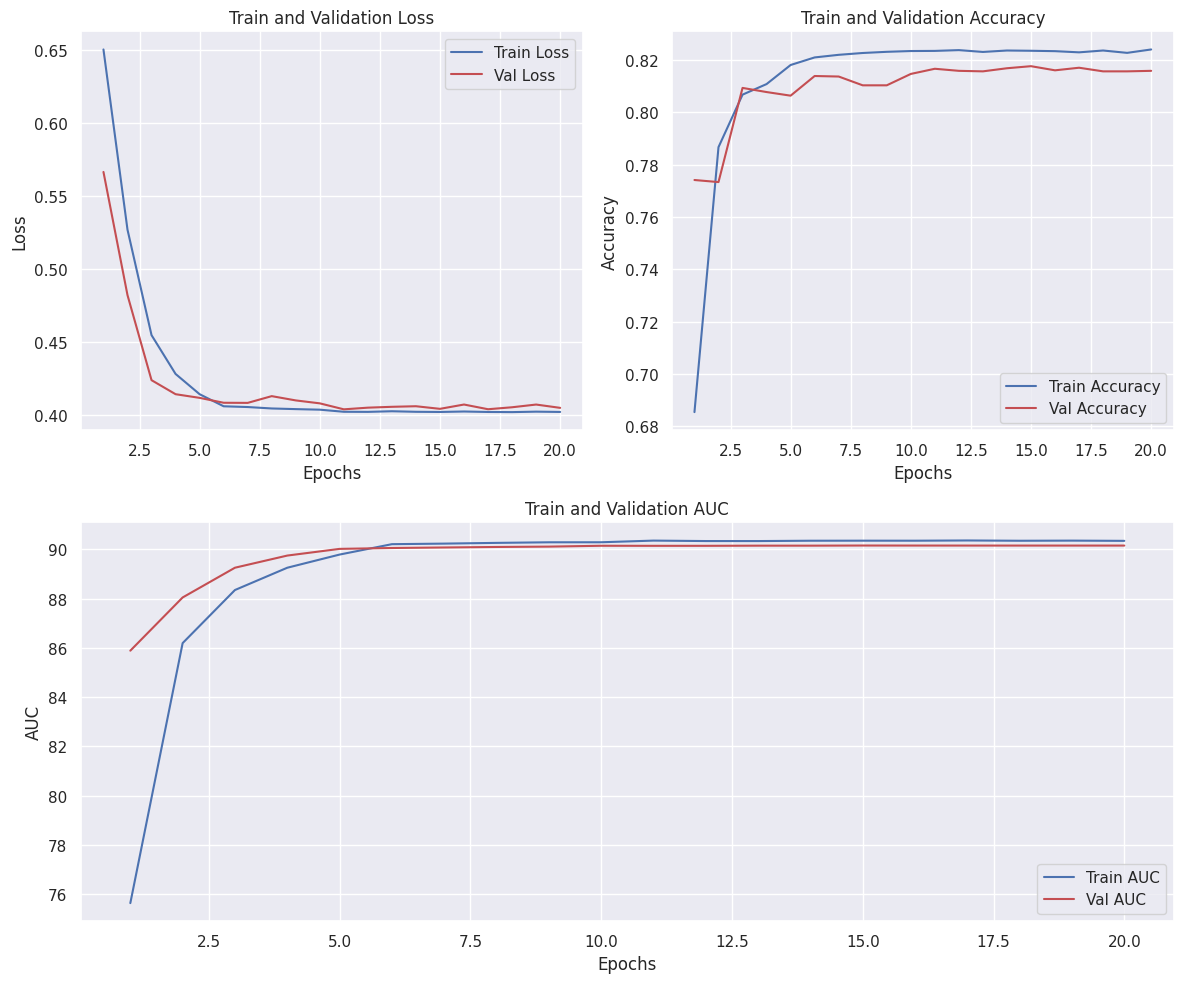

In [18]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [20]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0.1,
    lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=256,
    num_heads=2,
    num_blocks=2,
    pooling_method="MAX",
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
[196608, 256, 65536, 65536, 65536, 65536, 256, 256, 4096, 16, 4096, 256, 256, 256, 65536, 65536, 65536, 65536, 256, 256, 4096, 16, 4096, 256, 256, 256, 256, 256, 256, 1]
The model has 740,897 trainable parameters


Epoch   1/20:  11%|█         | 33/313 [00:00<00:04, 59.92batch/s]

Epoch  20/20: 100%|██████████| 313/313 [00:06<00:00, 49.48batch/s, Epoch = 0m 6s, Loss = 0.3820|0.3859, Acc = 0.829|0.824, AUC = 90.955|90.775]

TOTAL TIME = 168.69s
BEST ACC = 0.83% AT EPOCH 6
BEST AUC = 90.77 AT EPOCH 20


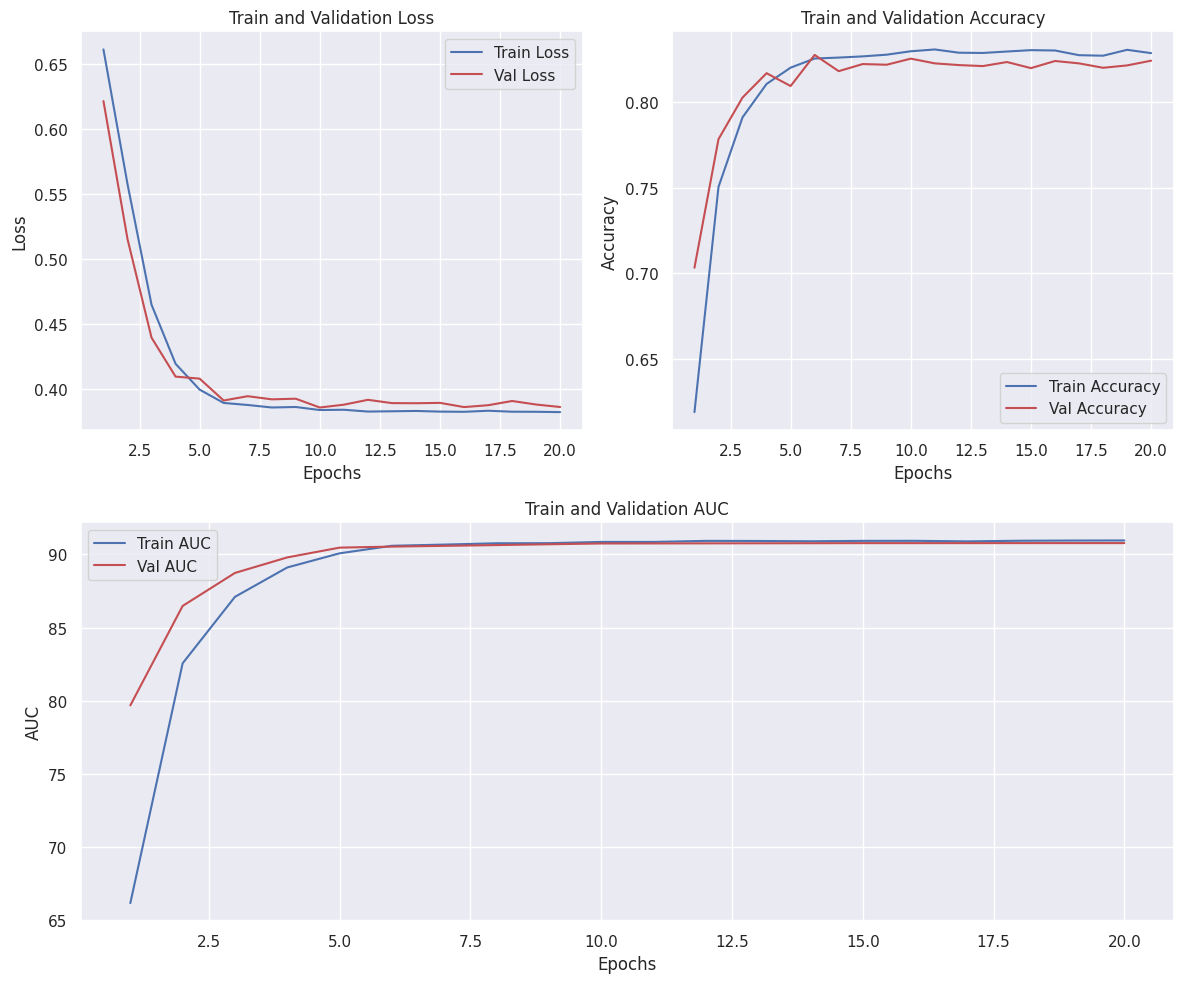

In [21]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [10]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


Epoch   1/20:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch  20/20: 100%|██████████| 313/313 [07:23<00:00,  1.42s/batch, Epoch = 7m 23s, Loss = 0.4580|0.4736, Acc = 0.801|0.787, AUC = 86.537|87.469]

TOTAL TIME = 8604.34s
BEST ACC = 0.79% AT EPOCH 9
BEST AUC = 87.47 AT EPOCH 11


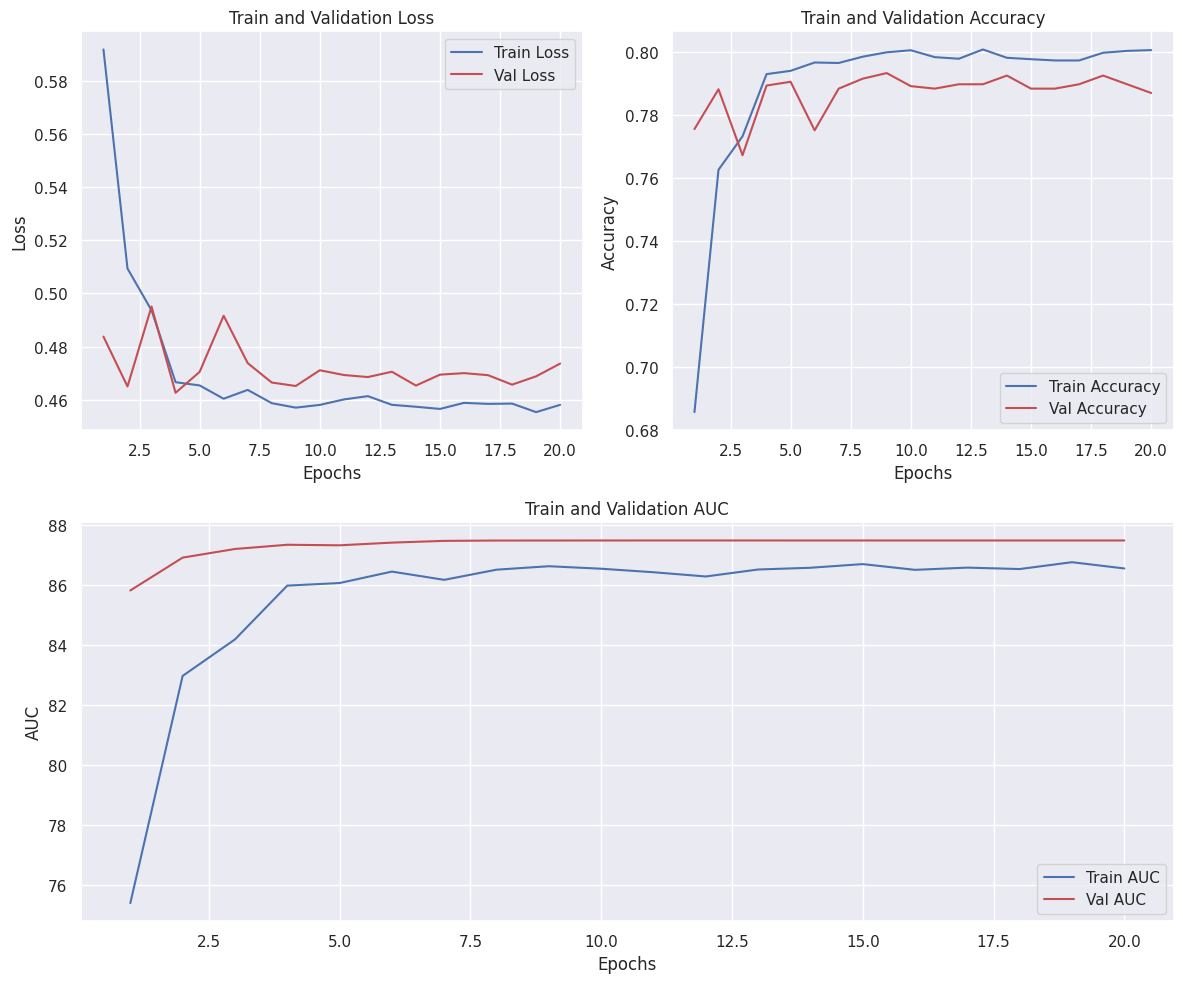

In [11]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [9]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, i

Epoch   2/20:  72%|███████▏  | 226/313 [05:03<01:56,  1.34s/batch]


KeyboardInterrupt: 